# Total Patients Prediction in RSUD Bandung

### Annisa Nurul Azhar - 23519025

### Description: predict total patients in RSUD Bandung for certain month
### Dataset used here is derived from raw data which is available at Bandung Open Data (*10 Kasus Penyakit Tertinggi di RSUD Kota Bandung berdasarkan Jenis Kelamin 2016-2019*)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('datasets/patients.csv')
dataset.head()

,year,month,patients
0,2016,Januari,25803
1,2016,Februari,20907
2,2016,Maret,23429
3,2016,April,23226
4,2016,Mei,26873


In [3]:
num_train = int(len(dataset)*0.8)
training_set = dataset.iloc[:int(len(dataset)*0.8), -1:].values
test_set = dataset.iloc[num_train+1:, -1:].values

In [4]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.transform(test_set)

In [5]:
x_train = []
y_train = []
x_test = []
y_test = []

for i in range(1, len(training_set)):
    x_train.append(training_set_scaled[i-1:i, 0])
    y_train.append(training_set_scaled[i,0])
    
for i in range(1, len(test_set)):
    x_test.append(test_set_scaled[i-1:i,0])
    y_test.append(test_set[i,0])
    
x_train, y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_train.shape[1], 1))

In [6]:
model = Sequential()
model.add(LSTM(256, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/100
 - 0s - loss: 0.1616
Epoch 2/100
 - 0s - loss: 0.0663
Epoch 3/100
 - 0s - loss: 0.0486
Epoch 4/100
 - 0s - loss: 0.0358
Epoch 5/100
 - 0s - loss: 0.0273
Epoch 6/100
 - 0s - loss: 0.0195
Epoch 7/100
 - 0s - loss: 0.0157
Epoch 8/100
 - 0s - loss: 0.0119
Epoch 9/100
 - 0s - loss: 0.0109
Epoch 10/100
 - 0s - loss: 0.0110
Epoch 11/100
 - 0s - loss: 0.0099
Epoch 12/100
 - 0s - loss: 0.0100
Epoch 13/100
 - 0s - loss: 0.0098
Epoch 14/100
 - 0s - loss: 0.0102
Epoch 15/100
 - 0s - loss: 0.0109
Epoch 16/100
 - 0s - loss: 0.0102
Epoch 17/100
 - 0s - loss: 0.0110
Epoch 18/100
 - 0s - loss: 0.0105
Epoch 19/100
 - 0s - loss: 0.0114
Epoch 20/100
 - 0s - loss: 0.0108
Epoch 21/100
 - 0s - loss: 0.0095
Epoch 22/100
 - 0s - loss: 0.0101
Epoch 23/100
 - 0s - loss: 0.0112
Epoch 24/100
 - 0s - loss: 0.0109
Epoch 25/100
 - 0s - loss: 0.0105
Epoch 26/100
 - 0s - loss: 0.0105
Epoch 27/100
 - 0s - loss: 0.0104
Epoch 28/

In [7]:
predicted_num_patients = model.predict(x_test)
predicted_num_patients = sc.inverse_transform(predicted_num_patients)

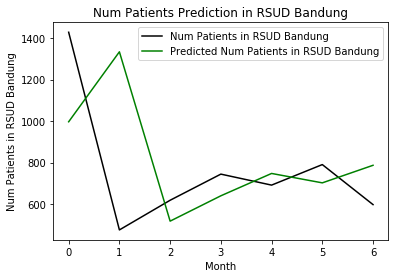

In [8]:
plt.plot(y_test, color = 'black', label = 'Num Patients in RSUD Bandung')
plt.plot(predicted_num_patients, color = 'green', label = 'Predicted Num Patients in RSUD Bandung')
plt.title('Num Patients Prediction in RSUD Bandung')
plt.xlabel('Month')
plt.ylabel('Num Patients in RSUD Bandung')
plt.legend()
plt.show()